In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
datos_procesados = pd.read_csv('merged_data.csv')
datos_procesados.head()

,Unnamed: 0,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),...,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,...,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,...,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,...,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,...,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,...,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340


In [21]:
qualitative_columns = ['Entity', 'Code'] 

In [22]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

datos_procesados_ecoding = pd.get_dummies(datos_procesados, columns=qualitative_columns)
datos_procesados_ecoding

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,Code_VCT,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE
0,0,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,...,False,False,False,False,False,False,False,False,False,False
1,1,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,...,False,False,False,False,False,False,False,False,False,False
2,2,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,...,False,False,False,False,False,False,False,False,False,False
3,3,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,...,False,False,False,False,False,False,False,False,False,False
4,4,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,5483,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,2.769193,...,False,False,False,False,False,False,False,False,False,True
5484,5484,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,2.778101,...,False,False,False,False,False,False,False,False,False,True
5485,5485,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,2.789152,...,False,False,False,False,False,False,False,False,False,True
5486,5486,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,2.799308,...,False,False,False,False,False,False,False,False,False,True


In [23]:
#standar scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_procesados_ecoding_scaled = datos_procesados_ecoding.copy()
datos_procesados_ecoding_scaled['Year'] = scaler.fit_transform(datos_procesados_ecoding_scaled[['Year']])

datos_procesados_ecoding_scaled

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,Code_VCT,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE
0,0,-1.671258,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,...,False,False,False,False,False,False,False,False,False,False
1,1,-1.547461,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,...,False,False,False,False,False,False,False,False,False,False
2,2,-1.423664,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,...,False,False,False,False,False,False,False,False,False,False
3,3,-1.299867,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,...,False,False,False,False,False,False,False,False,False,False
4,4,-1.176070,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,5483,1.176070,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,2.769193,...,False,False,False,False,False,False,False,False,False,True
5484,5484,1.299867,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,2.778101,...,False,False,False,False,False,False,False,False,False,True
5485,5485,1.423664,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,2.789152,...,False,False,False,False,False,False,False,False,False,True
5486,5486,1.547461,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,2.799308,...,False,False,False,False,False,False,False,False,False,True


### Clustering con K-means

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


In [25]:
#aplicacion coeficiente de silueta
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(datos_procesados_ecoding)
    silhouette_avg = silhouette_score(datos_procesados_ecoding, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg) 
    for cluster in range(0, n_clusters):
        cluster_silhouette_values = silhouette_samples(datos_procesados_ecoding, cluster_labels)
        print("    Cluster ", cluster, ":", np.mean(cluster_silhouette_values))

For n_clusters = 2 The average silhouette_score is : 0.990636024417179
    Cluster  0 : 0.990636024417179
    Cluster  1 : 0.990636024417179
For n_clusters = 3 The average silhouette_score is : 0.9723169125703224
    Cluster  0 : 0.9723169125703224
    Cluster  1 : 0.9723169125703224
    Cluster  2 : 0.9723169125703224
For n_clusters = 4 The average silhouette_score is : 0.9710444087975618
    Cluster  0 : 0.9710444087975618
    Cluster  1 : 0.9710444087975618
    Cluster  2 : 0.9710444087975618
    Cluster  3 : 0.9710444087975618
For n_clusters = 5 The average silhouette_score is : 0.8497381806812192
    Cluster  0 : 0.8497381806812192
    Cluster  1 : 0.8497381806812192
    Cluster  2 : 0.8497381806812192
    Cluster  3 : 0.8497381806812192
    Cluster  4 : 0.8497381806812192
For n_clusters = 6 The average silhouette_score is : 0.8494792073847675
    Cluster  0 : 0.8494792073847675
    Cluster  1 : 0.8494792073847675
    Cluster  2 : 0.8494792073847675
    Cluster  3 : 0.849479207384

### Representación del codo para el k óptimo

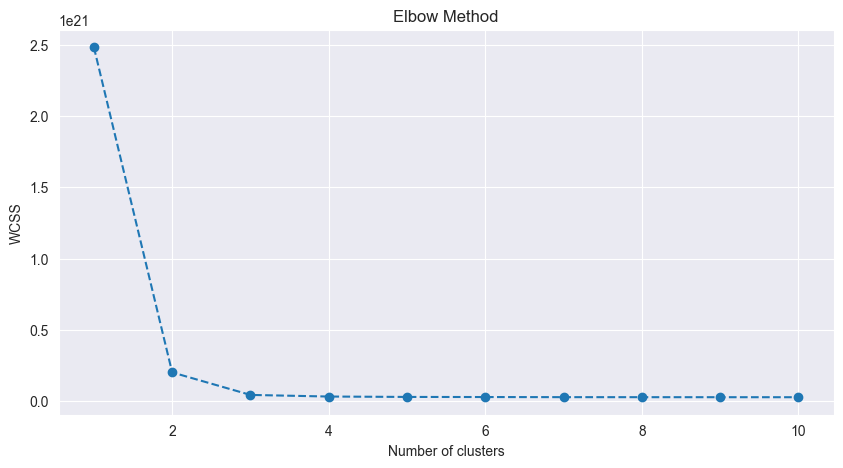

In [26]:
#representación del codo
from kneed import KneeLocator
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Creamos una lista para almacenar los valores de WCSS

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(datos_procesados_ecoding)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Clustering con K-means

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(datos_procesados_ecoding)

clusters_identificados = kmeans.predict(datos_procesados_ecoding)

In [28]:
datos_con_clusters = datos_procesados_ecoding.copy()
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters.head()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE,Cluster
0,0,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,...,False,False,False,False,False,False,False,False,False,0
1,1,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,...,False,False,False,False,False,False,False,False,False,0
2,2,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,...,False,False,False,False,False,False,False,False,False,0
3,3,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,...,False,False,False,False,False,False,False,False,False,0
4,4,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,...,False,False,False,False,False,False,False,False,False,0


In [29]:
datos_cluster_0 = datos_con_clusters[datos_con_clusters['Cluster'] == 0]
datos_cluster_1 = datos_con_clusters[datos_con_clusters['Cluster'] == 1]
datos_cluster_2 = datos_con_clusters[datos_con_clusters['Cluster'] == 2]

print(f"Datos en el cluster 0: {datos_cluster_0.shape[0]}\nDatos en el cluster 1: {datos_cluster_1.shape[0]}\nDatos en el cluster 2: {datos_cluster_2.shape[0]}")

Datos en el cluster 0: 5404
Datos en el cluster 1: 28
Datos en el cluster 2: 56


In [30]:
datos_cluster_0.head()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE,Cluster
0,0,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,...,False,False,False,False,False,False,False,False,False,0
1,1,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,...,False,False,False,False,False,False,False,False,False,0
2,2,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,...,False,False,False,False,False,False,False,False,False,0
3,3,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,...,False,False,False,False,False,False,False,False,False,0
4,4,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,...,False,False,False,False,False,False,False,False,False,0


In [31]:
datos_cluster_1.head()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE,Cluster
5376,5376,1990,0.253503,0.585743,0.177865,3.774653,0.900850,3.541656,1.438494,2.741715,...,False,False,False,False,False,False,False,False,False,1
5377,5377,1991,0.253542,0.585990,0.178034,3.772760,0.900952,3.545953,1.444019,2.747003,...,False,False,False,False,False,False,False,False,False,1
5378,5378,1992,0.253580,0.586309,0.178218,3.771018,0.901787,3.549090,1.449593,2.751733,...,False,False,False,False,False,False,False,False,False,1
5379,5379,1993,0.253643,0.586637,0.178419,3.769860,0.903045,3.550657,1.454155,2.755950,...,False,False,False,False,False,False,False,False,False,1
5380,5380,1994,0.253700,0.586930,0.178688,3.769128,0.904346,3.550852,1.457587,2.759427,...,False,False,False,False,False,False,False,False,False,1


In [32]:
datos_cluster_2.head()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE,Cluster
1036,1036,1990,0.318924,0.314535,0.085918,3.128626,1.147397,3.573966,0.981807,2.674116,...,False,False,False,False,False,False,False,False,False,2
1037,1037,1991,0.319391,0.314987,0.087021,3.132286,1.155388,3.572288,1.006175,2.682025,...,False,False,False,False,False,False,False,False,False,2
1038,1038,1992,0.319878,0.315466,0.088183,3.137312,1.161280,3.568730,1.030312,2.688792,...,False,False,False,False,False,False,False,False,False,2
1039,1039,1993,0.320381,0.315961,0.089405,3.143258,1.165176,3.562113,1.052846,2.692819,...,False,False,False,False,False,False,False,False,False,2
1040,1040,1994,0.320883,0.316452,0.090790,3.149544,1.167726,3.551869,1.072373,2.693938,...,False,False,False,False,False,False,False,False,False,2


#### Descripción de los clusters

In [33]:
datos_cluster_0.describe()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Cluster
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,...,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.0
mean,2741.251295,2003.500000,0.207051,0.720443,0.235429,3.955113,0.833272,3.472978,1.566029,2.795333,...,1.376315,3.228961,6.113540,4.040746,3.062258,3.876241,5.635259,3.472978,3.979735,0.0
std,1580.120006,8.078495,0.041117,0.162313,0.154854,1.141211,0.443495,0.676423,0.867900,0.555564,...,0.395218,0.868922,1.510413,1.044237,0.849738,1.034815,1.042248,0.676423,0.979150,0.0
min,0.000000,1990.000000,0.146902,0.324306,0.073908,2.023393,0.383650,2.139903,0.446940,1.594129,...,0.710318,1.805876,3.249315,2.231433,1.497964,1.946369,3.248216,2.139903,2.177050,0.0
25%,1378.750000,1996.750000,0.179030,0.617628,0.122026,3.177371,0.524491,2.946668,0.953828,2.392367,...,1.076253,2.578412,4.851254,3.217342,2.531489,3.149228,4.776486,2.946668,3.284332,0.0
50%,2757.500000,2003.500000,0.198237,0.696661,0.181071,3.523888,0.707022,3.458504,1.476348,2.751388,...,1.264580,2.962303,5.916030,3.916267,2.898974,3.693675,5.606699,3.458504,3.792682,0.0
75%,4108.250000,2010.250000,0.227746,0.833285,0.282090,4.664771,0.903703,3.880597,1.864122,3.116144,...,1.581487,3.708101,7.300037,4.689098,3.390043,4.421707,6.367054,3.880597,4.541107,0.0
max,5487.000000,2017.000000,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668,4.905163,...,3.303273,6.990122,11.531880,9.684816,9.053459,10.377815,9.777747,6.602754,9.626314,0.0


In [34]:
datos_cluster_1.describe()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,5389.500000,2003.500000,0.254047,0.590033,0.190053,3.792096,0.914003,3.504355,1.452807,2.751310,...,1.187966,3.432466,6.358659,4.027631,2.808275,3.792636,6.086789,3.504355,3.991414,1.0
std,8.225975,8.225975,0.000439,0.003628,0.011077,0.020115,0.010016,0.046068,0.025590,0.020558,...,0.031306,0.098826,0.040707,0.117926,0.025130,0.127709,0.047224,0.046068,0.067471,0.0
min,5376.000000,1990.000000,0.253503,0.585743,0.177865,3.764811,0.900850,3.439238,1.396497,2.722880,...,1.144757,3.255410,6.235598,3.879593,2.773646,3.611415,6.012109,3.439238,3.896392,1.0
25%,5382.750000,1996.750000,0.253699,0.587588,0.179971,3.773904,0.907946,3.443722,1.438480,2.729001,...,1.156161,3.347632,6.354048,3.892958,2.785545,3.658679,6.039184,3.443722,3.909367,1.0
50%,5389.500000,2003.500000,0.253904,0.588376,0.187003,3.789872,0.912016,3.532185,1.454998,2.756705,...,1.193281,3.463825,6.365877,4.038146,2.801943,3.817782,6.096697,3.532185,4.020126,1.0
75%,5396.250000,2010.250000,0.254466,0.592501,0.199143,3.806429,0.918423,3.541901,1.468085,2.770547,...,1.212086,3.499788,6.384210,4.117903,2.832502,3.886462,6.133125,3.541901,4.054538,1.0
max,5403.000000,2017.000000,0.254797,0.598083,0.211304,3.827818,0.941628,3.550852,1.494452,2.777318,...,1.241765,3.588507,6.404769,4.212519,2.843713,4.000391,6.142032,3.550852,4.064126,1.0


In [35]:
datos_cluster_2.describe()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Cluster
count,56.00000,56.00000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,1637.50000,2003.50000,0.294504,0.436842,0.120269,3.239558,0.798363,3.606902,1.254560,2.863470,...,0.875366,3.499293,8.025644,3.793315,2.303298,3.489052,7.000114,3.606902,3.784787,2.0
std,593.37736,8.15085,0.033110,0.118092,0.020432,0.084927,0.305254,0.222267,0.152583,0.235978,...,0.031478,0.302632,0.210693,0.575443,0.213484,0.577212,0.264575,0.222267,0.382456,0.0
min,1036.00000,1990.00000,0.257864,0.314535,0.085918,3.030969,0.474806,3.311306,0.981807,2.565868,...,0.821588,3.064257,7.669392,3.062228,1.966920,2.750003,6.618001,3.311306,3.320551,2.0
25%,1049.75000,1996.75000,0.261840,0.321280,0.105812,3.162407,0.501294,3.408052,1.152452,2.638945,...,0.848236,3.283143,7.847448,3.212401,2.084356,2.877271,6.825295,3.408052,3.392450,2.0
50%,1637.50000,2003.50000,0.291300,0.437267,0.117699,3.285710,0.780637,3.523353,1.218634,2.817214,...,0.869332,3.404068,8.012880,3.811961,2.346024,3.544097,6.971870,3.523353,3.748217,2.0
75%,2225.25000,2010.25000,0.326213,0.553342,0.136475,3.303319,1.094012,3.853025,1.406474,3.077457,...,0.903301,3.642827,8.119526,4.474403,2.468957,4.160945,7.129086,3.853025,4.243918,2.0
max,2239.00000,2017.00000,0.338174,0.557112,0.159588,3.339784,1.168675,3.990432,1.513665,3.265312,...,0.931320,4.155455,8.582643,4.617817,2.621141,4.338764,7.604436,3.990432,4.372507,2.0


### Clustering  Jerárquico

In [36]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

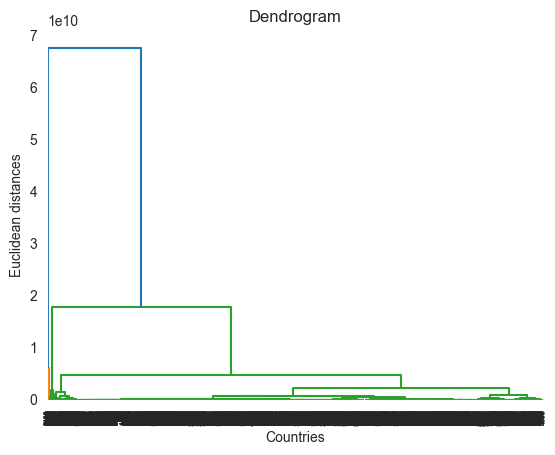

In [37]:
dendrogram = sch.dendrogram(sch.linkage(datos_procesados_ecoding, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [38]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
clusters_jerarquicos = hc.fit_predict(datos_procesados_ecoding)
clusters_jerarquicos

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
datos_con_clusters_jerarquicos = datos_procesados_ecoding.copy()
datos_con_clusters_jerarquicos['Cluster'] = clusters_jerarquicos
datos_con_clusters_jerarquicos.head()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE,Cluster
0,0,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,...,False,False,False,False,False,False,False,False,False,1
1,1,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,...,False,False,False,False,False,False,False,False,False,1
2,2,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,...,False,False,False,False,False,False,False,False,False,1
3,3,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,...,False,False,False,False,False,False,False,False,False,1
4,4,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,...,False,False,False,False,False,False,False,False,False,1


In [40]:
datos_cluster_0_jerarquico = datos_con_clusters_jerarquicos[datos_con_clusters_jerarquicos['Cluster'] == 0]
datos_cluster_1_jerarquico = datos_con_clusters_jerarquicos[datos_con_clusters_jerarquicos['Cluster'] == 1]
datos_cluster_2_jerarquico = datos_con_clusters_jerarquicos[datos_con_clusters_jerarquicos['Cluster'] == 2]

print(f"Datos en el cluster 0: {datos_cluster_0_jerarquico.shape[0]}\nDatos en el cluster 1: {datos_cluster_1_jerarquico.shape[0]}\nDatos en el cluster 2: {datos_cluster_2_jerarquico.shape[0]}")

Datos en el cluster 0: 28
Datos en el cluster 1: 5404
Datos en el cluster 2: 56


In [41]:
datos_cluster_0_jerarquico.describe()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,5389.500000,2003.500000,0.254047,0.590033,0.190053,3.792096,0.914003,3.504355,1.452807,2.751310,...,1.187966,3.432466,6.358659,4.027631,2.808275,3.792636,6.086789,3.504355,3.991414,0.0
std,8.225975,8.225975,0.000439,0.003628,0.011077,0.020115,0.010016,0.046068,0.025590,0.020558,...,0.031306,0.098826,0.040707,0.117926,0.025130,0.127709,0.047224,0.046068,0.067471,0.0
min,5376.000000,1990.000000,0.253503,0.585743,0.177865,3.764811,0.900850,3.439238,1.396497,2.722880,...,1.144757,3.255410,6.235598,3.879593,2.773646,3.611415,6.012109,3.439238,3.896392,0.0
25%,5382.750000,1996.750000,0.253699,0.587588,0.179971,3.773904,0.907946,3.443722,1.438480,2.729001,...,1.156161,3.347632,6.354048,3.892958,2.785545,3.658679,6.039184,3.443722,3.909367,0.0
50%,5389.500000,2003.500000,0.253904,0.588376,0.187003,3.789872,0.912016,3.532185,1.454998,2.756705,...,1.193281,3.463825,6.365877,4.038146,2.801943,3.817782,6.096697,3.532185,4.020126,0.0
75%,5396.250000,2010.250000,0.254466,0.592501,0.199143,3.806429,0.918423,3.541901,1.468085,2.770547,...,1.212086,3.499788,6.384210,4.117903,2.832502,3.886462,6.133125,3.541901,4.054538,0.0
max,5403.000000,2017.000000,0.254797,0.598083,0.211304,3.827818,0.941628,3.550852,1.494452,2.777318,...,1.241765,3.588507,6.404769,4.212519,2.843713,4.000391,6.142032,3.550852,4.064126,0.0


In [42]:
datos_cluster_1_jerarquico.describe()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Cluster
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,...,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.0
mean,2741.251295,2003.500000,0.207051,0.720443,0.235429,3.955113,0.833272,3.472978,1.566029,2.795333,...,1.376315,3.228961,6.113540,4.040746,3.062258,3.876241,5.635259,3.472978,3.979735,1.0
std,1580.120006,8.078495,0.041117,0.162313,0.154854,1.141211,0.443495,0.676423,0.867900,0.555564,...,0.395218,0.868922,1.510413,1.044237,0.849738,1.034815,1.042248,0.676423,0.979150,0.0
min,0.000000,1990.000000,0.146902,0.324306,0.073908,2.023393,0.383650,2.139903,0.446940,1.594129,...,0.710318,1.805876,3.249315,2.231433,1.497964,1.946369,3.248216,2.139903,2.177050,1.0
25%,1378.750000,1996.750000,0.179030,0.617628,0.122026,3.177371,0.524491,2.946668,0.953828,2.392367,...,1.076253,2.578412,4.851254,3.217342,2.531489,3.149228,4.776486,2.946668,3.284332,1.0
50%,2757.500000,2003.500000,0.198237,0.696661,0.181071,3.523888,0.707022,3.458504,1.476348,2.751388,...,1.264580,2.962303,5.916030,3.916267,2.898974,3.693675,5.606699,3.458504,3.792682,1.0
75%,4108.250000,2010.250000,0.227746,0.833285,0.282090,4.664771,0.903703,3.880597,1.864122,3.116144,...,1.581487,3.708101,7.300037,4.689098,3.390043,4.421707,6.367054,3.880597,4.541107,1.0
max,5487.000000,2017.000000,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668,4.905163,...,3.303273,6.990122,11.531880,9.684816,9.053459,10.377815,9.777747,6.602754,9.626314,1.0


In [43]:
datos_cluster_2_jerarquico.describe()

,Unnamed: 0,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Cluster
count,56.00000,56.00000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,1637.50000,2003.50000,0.294504,0.436842,0.120269,3.239558,0.798363,3.606902,1.254560,2.863470,...,0.875366,3.499293,8.025644,3.793315,2.303298,3.489052,7.000114,3.606902,3.784787,2.0
std,593.37736,8.15085,0.033110,0.118092,0.020432,0.084927,0.305254,0.222267,0.152583,0.235978,...,0.031478,0.302632,0.210693,0.575443,0.213484,0.577212,0.264575,0.222267,0.382456,0.0
min,1036.00000,1990.00000,0.257864,0.314535,0.085918,3.030969,0.474806,3.311306,0.981807,2.565868,...,0.821588,3.064257,7.669392,3.062228,1.966920,2.750003,6.618001,3.311306,3.320551,2.0
25%,1049.75000,1996.75000,0.261840,0.321280,0.105812,3.162407,0.501294,3.408052,1.152452,2.638945,...,0.848236,3.283143,7.847448,3.212401,2.084356,2.877271,6.825295,3.408052,3.392450,2.0
50%,1637.50000,2003.50000,0.291300,0.437267,0.117699,3.285710,0.780637,3.523353,1.218634,2.817214,...,0.869332,3.404068,8.012880,3.811961,2.346024,3.544097,6.971870,3.523353,3.748217,2.0
75%,2225.25000,2010.25000,0.326213,0.553342,0.136475,3.303319,1.094012,3.853025,1.406474,3.077457,...,0.903301,3.642827,8.119526,4.474403,2.468957,4.160945,7.129086,3.853025,4.243918,2.0
max,2239.00000,2017.00000,0.338174,0.557112,0.159588,3.339784,1.168675,3.990432,1.513665,3.265312,...,0.931320,4.155455,8.582643,4.617817,2.621141,4.338764,7.604436,3.990432,4.372507,2.0


In [48]:
import numpy as np

# Diccionarios para almacenar los nombres de las columnas con los valores promedio más altos y más bajos para cada cluster
promedio_mas_alto = {0: [], 1: [], 2: []}
promedio_mas_bajo = {0: [], 1: [], 2: []}

# Iterar sobre las columnas
for columna in datos_cluster_0_jerarquico.columns:
    # si la columna es un valor booleano, no se almacena
    if datos_cluster_0_jerarquico[columna].dtype == bool:
        continue
    # Calcular el valor promedio para cada cluster
    promedio_cluster_0 = datos_cluster_0_jerarquico[columna].mean()
    promedio_cluster_1 = datos_cluster_1_jerarquico[columna].mean()
    promedio_cluster_2 = datos_cluster_2_jerarquico[columna].mean()
    
    
    # Encontrar el valor promedio más alto y más bajo entre los tres clusters
    promedios = np.array([promedio_cluster_0, promedio_cluster_1, promedio_cluster_2])
    indice_mas_alto = np.argmax(promedios)
    indice_mas_bajo = np.argmin(promedios)
    
    # si son iguales, no se almacenan
    if indice_mas_alto == indice_mas_bajo:
        continue
    
    # Almacenar los nombres de las columnas con los valores promedio más altos y más bajos para cada cluster
    promedio_mas_alto[indice_mas_alto].append(columna)
    promedio_mas_bajo[indice_mas_bajo].append(columna)

# Imprimir los resultados
for cluster in range(3):
    print(f"Cluster {cluster}:")
    print("Promedios más altos:", promedio_mas_alto[cluster])
    print("Promedios más bajos:", promedio_mas_bajo[cluster])
    print()


Cluster 0:
Promedios más altos: ['Unnamed: 0', 'Drug use disorders (%)', 'Population_x', 'Population_y', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)', '15-49 years old (%)']
Promedios más bajos: ['Prevalence in males (%)', 'Cluster']

Cluster 1:
Promedios más altos: ['Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Alcohol use disorders (%)', '20-24 years old (%)', '10-14 years old (%)', '30-34 years old (%)', '15-19 years old (%)', '25-29 years old (%)']
Promedios más bajos: ['Schizophrenia (%)', 'Depression (%)', 'Prevalence in females (%)', 'Population_x', 'Suicide rate (deaths per 100,000 individuals)', 'Depressive disorder rates (number suffering per 100,000)', 'Population_y', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)', 'All ages (%)', '70+ years old (%)', '50-69 years old (%)', 'Age-standardized (%)']

Cluster 2:
Promedios más al